In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import scipy
from scipy import stats
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, r2_score
from scipy.stats import skew
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import utils
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost.sklearn import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('my_df.csv')
df.head(2)

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,BuildingAge
0,0.0,0.125,0.25,0.5,0.500000,0.129964,0.595960,0.167644,0.123054,0.165009,0.765217
1,0.0,0.125,0.25,0.5,0.458333,0.157228,0.606061,0.194892,0.000000,0.195392,0.165217


In [3]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'TotalGHGEmissions', 'BuildingAge'],
      dtype='object')

In [4]:
features=[ 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'NumberofBuildings','NumberofFloors', 'PropertyGFATotal', 'SteamUse(kBtu)','TotalGHGEmissions', 'BuildingAge' ]

x=df[features]

y=df['SiteEnergyUse(kBtu)']

In [5]:
sm_x= sm.add_constant(x)

mlr_model = sm.OLS(y, sm_x)
mlr_reg = mlr_model.fit()

mlr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUse(kBtu)   R-squared:                       0.808
Model:                             OLS   Adj. R-squared:                  0.807
Method:                  Least Squares   F-statistic:                     478.5
Date:                 Fri, 07 Jul 2023   Prob (F-statistic):          1.75e-319
Time:                         21:45:17   Log-Likelihood:                 1213.5
No. Observations:                  917   AIC:                            -2409.
Df Residuals:                      908   BIC:                            -2366.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0304      0.016      1.899      0.058      -0.001       0.062
BuildingType        -2.363e-16   1.96e-17    -12.045      0.000   -2.75e-16   -1.98e-16
PrimaryPropertyType     0.0016      0.008      0.211      0.833      -0.013       0.017
Neighborhood           -0.0159      0.010     -1.597      0.111      -0.035       0.004
NumberofBuildings      -0.0250      0.026     -0.971      0.332      -0.076       0.026
NumberofFloors          0.0601      0.018      3.268      0.001       0.024       0.096
PropertyGFATotal        0.3354      0.018     18.677      0.000       0.300       0.371
SteamUse(kBtu)         -0.4368      0.040    -10.847      0.000      -0.516      -0.358
TotalGHGEmissions       1.0161      0.032     31.981      0.000       0.954       1.078
BuildingAge            -0.0229      0.008     -2.725      0.007      -0.039      -0.006
==============================================================================
Omnibus:                      939.406   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73613.640
Skew:                           4.646   Prob(JB):                         0.00
Kurtosis:                      45.899   Cond. No.                     2.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
features1=[ 'BuildingType','NumberofFloors', 'PropertyGFATotal', 'SteamUse(kBtu)','TotalGHGEmissions', 'BuildingAge' ]

X=df[features1]

In [7]:
sm_X= sm.add_constant(X)

mlr_model = sm.OLS(y, sm_X)
mlr_reg = mlr_model.fit()

mlr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUse(kBtu)   R-squared:                       0.808
Model:                             OLS   Adj. R-squared:                  0.806
Method:                  Least Squares   F-statistic:                     764.4
Date:                 Fri, 07 Jul 2023   Prob (F-statistic):          5.93e-323
Time:                         21:45:17   Log-Likelihood:                 1211.7
No. Observations:                  917   AIC:                            -2411.
Df Residuals:                      911   BIC:                            -2382.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0099      0.005      1.913      0.056      -0.000       0.020
BuildingType       4.244e-15   1.34e-16     31.654      0.000    3.98e-15    4.51e-15
NumberofFloors        0.0640      0.018      3.608      0.000       0.029       0.099
PropertyGFATotal      0.3367      0.018     19.003      0.000       0.302       0.371
SteamUse(kBtu)       -0.4313      0.040    -10.746      0.000      -0.510      -0.352
TotalGHGEmissions     1.0123      0.031     32.148      0.000       0.951       1.074
BuildingAge          -0.0197      0.008     -2.416      0.016      -0.036      -0.004
==============================================================================
Omnibus:                      939.837   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74003.595
Skew:                           4.648   Prob(JB):                         0.00
Kurtosis:                      46.017   Cond. No.                     4.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  7e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

## Lineaire regression

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_test)

print("LR_MAE :","%.2f" % metrics.mean_absolute_error(y_test, lr_predict))
print("LR_MSE :","%.2f" % metrics.mean_squared_error(y_test,lr_predict))
print("LR_RMSE :","%.2f" % np.sqrt(metrics.mean_squared_error(y_test,lr_predict)))
print("LR_R2  :","%.2f" % metrics.r2_score(y_test, lr_predict))

LR_MAE : 0.03
LR_MSE : 0.00
LR_RMSE : 0.06
LR_R2  : 0.85


In [10]:
print("%.2f" % lr_model.score(X_test,y_test))

0.85


In [11]:
print("%.2f" % lr_model.score(X_train,y_train))

0.79


L’écart entre la performance sur l’ensemble d’apprentissage et l’ensemble de test est un signe de surapprentissage.

On doit donc chercher un modèle qui permette de contrôler la complexité.


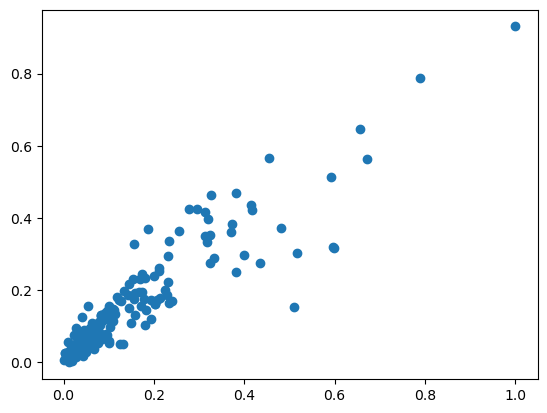

In [12]:
plt.scatter(y_test, lr_predict)

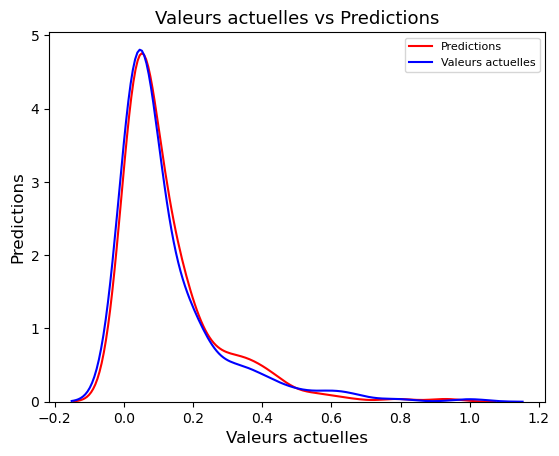

In [13]:
sns.distplot(lr_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(y_test, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs actuelles', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);

In [14]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

### Ridge

In [15]:
rr_model = Ridge()
rr_model.fit(X_train,y_train)
rr_predict = rr_model.predict(X_test)

print("RIDGE_MAE :","%.2f" % metrics.mean_absolute_error(y_test, rr_predict))
print("RIDGE_R2  :","%.2f" % metrics.r2_score(y_test, rr_predict))

RIDGE_MAE : 0.04
RIDGE_R2  : 0.84


In [16]:
print("%.2f" % rr_model.score(X_train,y_train))

0.77


#### Ridge grid search

In [17]:
param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [18]:
ridge_CV = GridSearchCV(rr_model, param, cv=cv)
ridge_CV_predict=ridge_CV.fit(X_train, y_train).predict(X_test)
print("Meilleurs hyperparamètres Ridge_CV:", ridge_CV.best_params_)
print("Meilleure performance Ridge_CV:", ridge_CV.best_score_)

Meilleurs hyperparamètres Ridge_CV: {'alpha': 0.01, 'fit_intercept': True, 'solver': 'saga'}
Meilleure performance Ridge_CV: 0.7852271218628537


In [19]:
rr_CV_model = Ridge(alpha= 0.01,fit_intercept=True, solver= 'saga')
rr_CV_model.fit(X_train,y_train)
rr_CV_predict = rr_CV_model.predict(X_test)

print("Ridge_CV_MAE :","%.2f" % metrics.mean_absolute_error(y_test, rr_CV_predict))
print("Ridge_CV_R2 :","%.2f" % metrics.r2_score(y_test, rr_CV_predict))

Ridge_CV_MAE : 0.03
Ridge_CV_R2 : 0.85


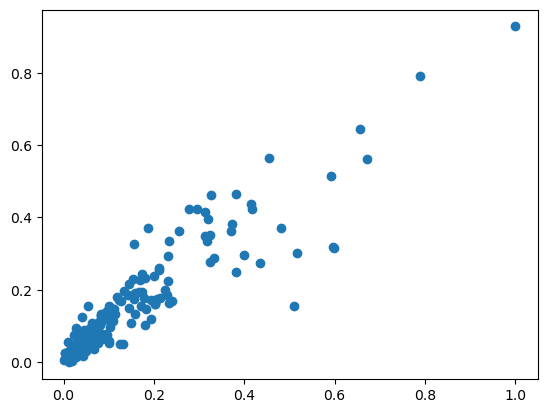

In [20]:
plt.scatter(y_test, rr_CV_predict)

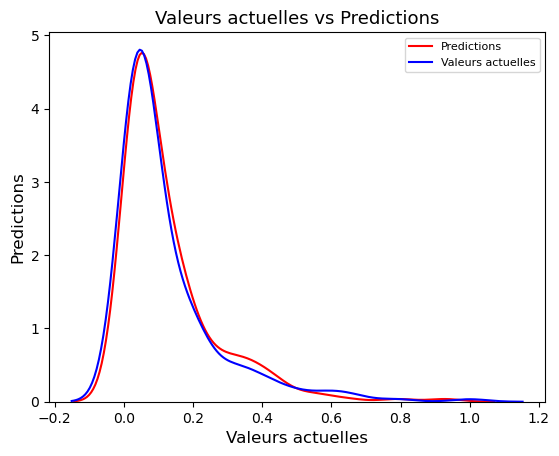

In [21]:
sns.distplot(rr_CV_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(y_test, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs actuelles', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);

### XGBoost

In [22]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predict = xgb_model.predict(X_test)

print("XGB_MAE :","%.2f" % metrics.mean_absolute_error(y_test, xgb_predict))
print("XGB_MSE :","%.2f" % metrics.mean_squared_error(y_test,xgb_predict))
print("XGB_RMSE :","%.2f" % np.sqrt(metrics.mean_squared_error(y_test,xgb_predict)))
print("XGB_R2:","%.2f" % metrics.r2_score(y_test, xgb_predict))


XGB_MAE : 0.04
XGB_MSE : 0.00
XGB_RMSE : 0.07
XGB_R2: 0.80


#### XGBoost grid search

In [23]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}


xgb_CV = GridSearchCV(xgb_model, params,scoring='r2', verbose=1, cv=cv)
xgb_CV.fit(X_train, y_train)
print("Meilleurs hyperparamètres XGB:", xgb_CV.best_params_)
print("Meilleure performance XGB:", xgb_CV.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs hyperparamètres XGB: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Meilleure performance XGB: 0.7853404826268532


In [24]:
xgb_CV_model = XGBRegressor(colsample_bytree= 0.7, learning_rate=0.01, max_depth= 3, n_estimators= 1000)
xgb_CV_model.fit(X_train,y_train)
xgb_CV_predict = xgb_CV_model.predict(X_test)

print("XGB_CV_MAE :","%.2f" % metrics.mean_absolute_error(y_test, xgb_CV_predict))
print("XGB_CV_R2 :","%.2f" % metrics.r2_score(y_test, xgb_CV_predict))

XGB_CV_MAE : 0.04
XGB_CV_R2 : 0.78


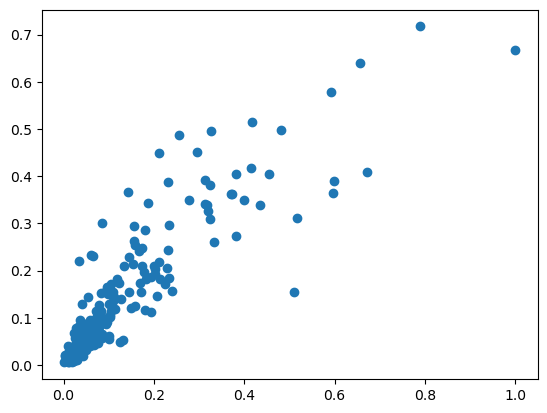

In [25]:
plt.scatter(y_test, xgb_CV_predict)

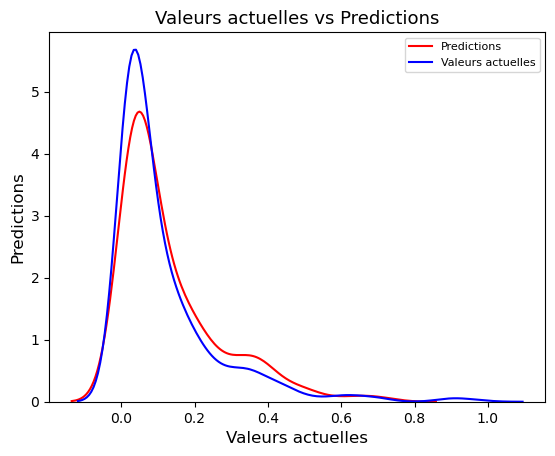

In [26]:
sns.distplot(xgb_CV_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(y_train, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs actuelles', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);

## KNN

In [27]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)

print("KNN_MAE :","%.2f" % metrics.mean_absolute_error(y_test, knn_predict))
print("KNN_MSE :","%.2f" % metrics.mean_squared_error(y_test,knn_predict))
print("KNN_RMSE :","%.2f" % np.sqrt(metrics.mean_squared_error(y_test,knn_predict)))
print("KNN_R2:","%.2f" % metrics.r2_score(y_test, knn_predict))

KNN_MAE : 0.04
KNN_MSE : 0.01
KNN_RMSE : 0.08
KNN_R2: 0.72


#### Knn grid search

In [28]:
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}


In [29]:
knn_CV = GridSearchCV(knn_model, params, cv=cv)
knn_CV.fit(X_train, y_train)
print("Meilleurs hyperparamètres KNN:", knn_CV.best_params_)
print("Meilleure performance KNN:", knn_CV.best_score_)

Meilleurs hyperparamètres KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Meilleure performance KNN: 0.7079793425774379


In [30]:
knn_CV_model = KNeighborsRegressor(n_neighbors= 7, p= 1, weights = 'distance')
knn_CV_model.fit(X_train,y_train)
knn_CV_predict = knn_CV_model.predict(X_test)

print("KNN_CV_MAE :","%.2f" % metrics.mean_absolute_error(y_test, knn_CV_predict))
print("KNN_CV_R2 :","%.2f" % metrics.r2_score(y_test, knn_CV_predict))

KNN_CV_MAE : 0.04
KNN_CV_R2 : 0.74


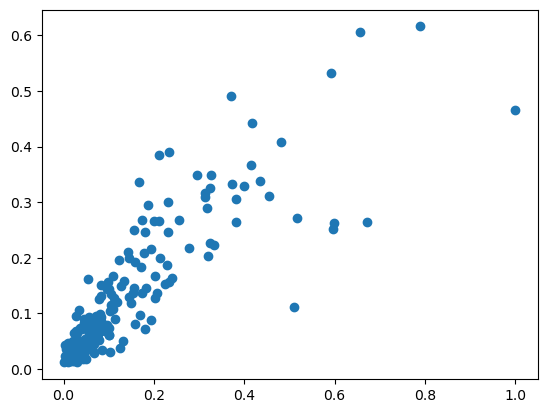

In [31]:
plt.scatter(y_test, knn_CV_predict)

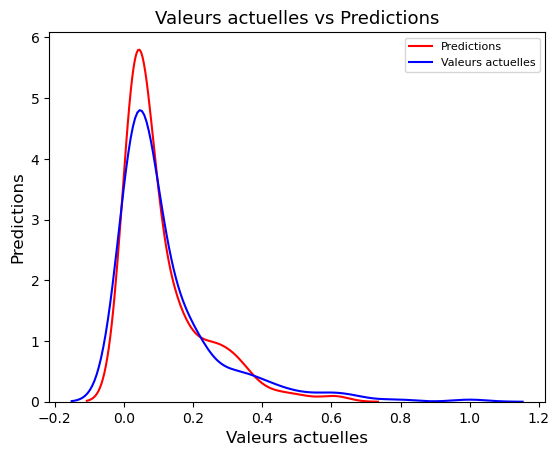

In [32]:
sns.distplot(knn_CV_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(y_test, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs actuelles', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);

## Random Forest

In [33]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
rfr_predict = rfr_model.predict(X_test)

print("RANDOMF_MAE :","%.2f" % metrics.mean_absolute_error(y_test, rfr_predict))
print("RANDOMF_MSE :","%.2f" % metrics.mean_squared_error(y_test,rfr_predict))
print("RANDOMF_RMSE :","%.2f" % np.sqrt(metrics.mean_squared_error(y_test,rfr_predict)))
print("RANDOMF_R2:","%.2f" % metrics.r2_score(y_test, rfr_predict))

RANDOMF_MAE : 0.04
RANDOMF_MSE : 0.00
RANDOMF_RMSE : 0.07
RANDOMF_R2: 0.80


#### RandomF grid search

In [34]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

rfr_CV = GridSearchCV(rfr_model, param_grid, cv=cv)
rfr_CV.fit(X_train, y_train)
print("Meilleurs hyperparamètres Random_Forest:", rfr_CV.best_params_)
print("Meilleure performance Random_Forest:",rfr_CV.best_score_)

Meilleurs hyperparamètres Random_Forest: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}
Meilleure performance Random_Forest: 0.7798414204393299


In [51]:
rfr_CV_model = RandomForestRegressor(max_depth= 5, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 30)
rfr_CV_model.fit(X_train,y_train)
rfr_CV_predict = rfr_CV_model.predict(X_test)

print("RANDOMF_CV_MAE :","%.2f" % metrics.mean_absolute_error(y_test, rfr_CV_predict))
print("RANDOMF_CV_R2 :","%.2f" % metrics.r2_score(y_test, rfr_CV_predict))

RANDOMF_CV_MAE : 0.04
RANDOMF_CV_R2 : 0.83


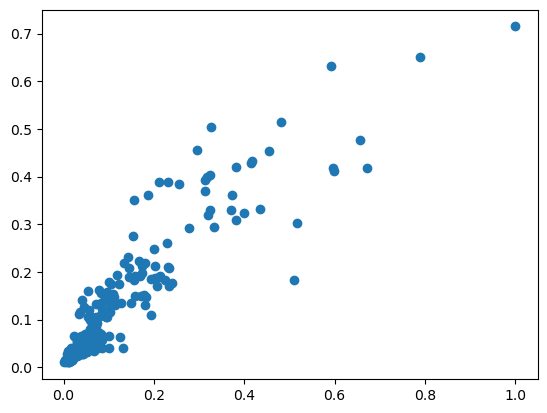

In [52]:
plt.scatter(y_test, rfr_CV_predict)

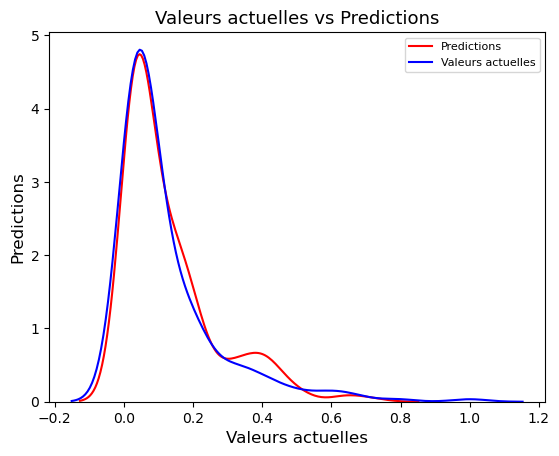

In [53]:
sns.distplot(rfr_CV_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(y_test, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs actuelles', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);

## CHOIX DU MEILLEUR MODELE DE MACHINE LEARNING

In [54]:
[]
RANDOMF_CV_R2 = metrics.r2_score(y_test, rfr_CV_predict)
KNN_CV_R2 = metrics.r2_score(y_test, knn_CV_predict)
XGB_CV_R2 = metrics.r2_score(y_test, xgb_CV_predict)
Ridge_CV_R2 = metrics.r2_score(y_test, rr_CV_predict)

ScoreTable = PrettyTable([ 'Metrique','Ridge (%)', 'Knn (%)', 'Rand_FOREST (%)', 'XGBOOST (%)'])
ScoreTable.add_row(['R2',Ridge_CV_R2*100,KNN_CV_R2*100,RANDOMF_CV_R2*100 ,XGB_CV_R2*100])

ScoreTable.float_format = '.2'
print(ScoreTable)

+----------+-----------+---------+-----------------+-------------+
| Metrique | Ridge (%) | Knn (%) | Rand_FOREST (%) | XGBOOST (%) |
+----------+-----------+---------+-----------------+-------------+
|    R2    |   84.92   |  73.59  |      82.88      |    78.30    |
+----------+-----------+---------+-----------------+-------------+


In [56]:

table = PrettyTable()

table.field_names = ["R2", "valeur (%)"]
table.add_row(['Ridge ',metrics.r2_score(y_test, rr_CV_predict)*100])
table.add_row(['Knn', metrics.r2_score(y_test, knn_CV_predict)*100])
table.add_row(['Rand_Forest', metrics.r2_score(y_test, rfr_CV_predict)*100])
table.add_row(['XGBOOST', metrics.r2_score(y_test, xgb_CV_predict)*100])
table.float_format = '.2'
table

R2,valeur (%)
Ridge,84.92
Knn,73.59
Rand_Forest,82.88
XGBOOST,78.30


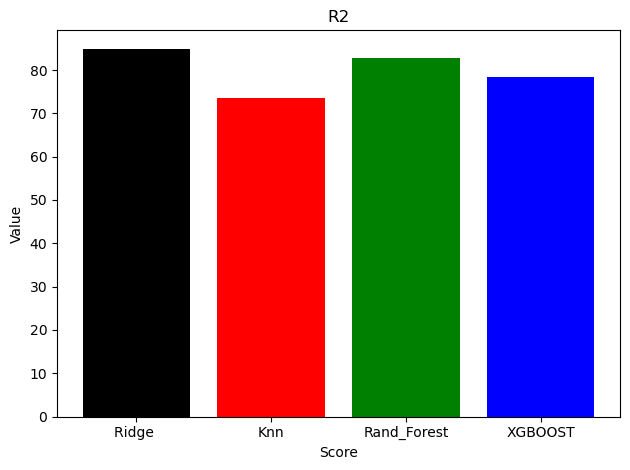

In [57]:
categories = [row[0] for row in table._rows]
values = [row[1] for row in table._rows]

plt.bar(categories, values,color=['black', 'red', 'green', 'blue', 'orange']  )
plt.xlabel("Score")
plt.ylabel("Value")
plt.title("R2")
plt.tight_layout()
plt.show()

Le meilleur modèle dans notre cas est **Ridge**.

**PREDICTION EN UTILISANT ENERGY STAR SCORE et LE MODELE CHOISI**

In [58]:

features_Score= [ 'ENERGYSTARScore','BuildingType','NumberofFloors', 'PropertyGFATotal', 'SteamUse(kBtu)','TotalGHGEmissions', 'BuildingAge' ]

XScore=df[features_Score]

yScore=df['SiteEnergyUse(kBtu)']

In [59]:
XScore_train, XScore_test, yScore_train, yScore_test = train_test_split(XScore, yScore, random_state=42, test_size=0.25)

In [47]:
rrScore_CV_model = Ridge(alpha= 0.01,fit_intercept=True, solver= 'saga')
rrScore_CV_model.fit(XScore_train,yScore_train)
rrScore_CV_predict = rrScore_CV_model.predict(XScore_test)

print("RidgeScore_CV_MAE :","%.2f" % metrics.mean_absolute_error(yScore_test, rrScore_CV_predict))
print("RidgeFScore_CV_R2 :","%.2f" % metrics.r2_score(yScore_test, rrScore_CV_predict))

RidgeScore_CV_MAE : 0.03
RidgeFScore_CV_R2 : 0.87


In [48]:
table = PrettyTable()
table.field_names = ["Métrique","Sans ENERGYSTARScore", "Avec ENERGYSTARScore"]
table.add_row(['R2 ', metrics.r2_score(y_test, rr_CV_predict)*100,metrics.r2_score(yScore_test, rrScore_CV_predict)*100])
table.add_row(['MAE',metrics.mean_absolute_error(y_test, rr_CV_predict)*100 ,metrics.mean_absolute_error(yScore_test, rrScore_CV_predict)*100])
table.float_format = '.2'
table

Métrique,Sans ENERGYSTARScore,Avec ENERGYSTARScore
R2,84.92,86.76
MAE,3.49,3.31


### Feature Importance 

In [49]:
rr_importance =rrScore_CV_model.coef_
rr_importance

array([-0.05344516,  0.        ,  0.09431589,  0.35294474, -0.44927082,
        0.96184503, -0.01589065])

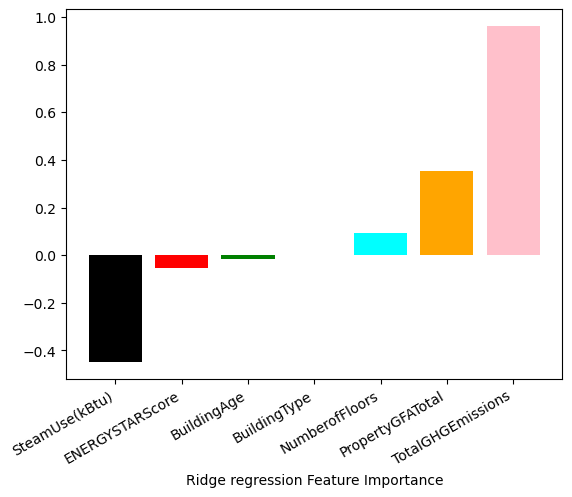

In [50]:
sorted_idx = rr_importance.argsort()
plt.bar(XScore.columns[sorted_idx], rr_importance[sorted_idx],color=['black', 'red', 'green', 'blue', 'cyan', 'orange','pink'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("Ridge regression Feature Importance");

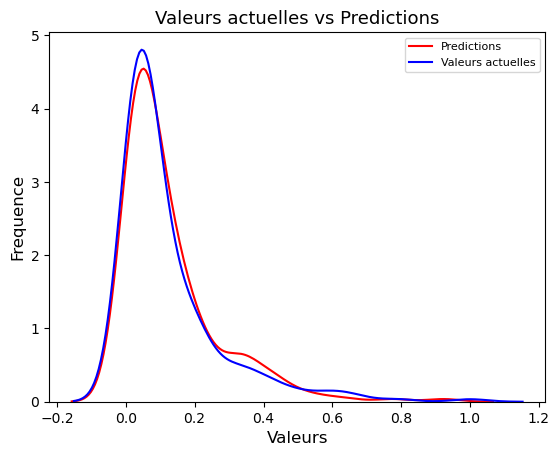

In [45]:
sns.distplot(rrScore_CV_predict, hist = False, color = 'r', label = 'Predictions')
sns.distplot(yScore_test, hist = False, color = 'b', label = 'Valeurs actuelles')
plt.title('Valeurs actuelles vs Predictions', fontsize = 13)

plt.xlabel('Valeurs', fontsize = 12)
plt.ylabel('Frequence', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8);